In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from implementations import *
from helpers import *

# Data import and cleaning

In [2]:
[yb_t, input_data_t, ids_t, yb_test, input_data_test, ids_test]= pickle.load(open( "dat.p", "rb" ))

In [3]:
input_clean = clean_data(input_data_t)
test_clean = clean_data(input_data_test)

In [4]:
n_features = len(input_data_t[0,:])
n_points = len(input_data_t)

print(n_features)
print(n_points)

30
5000


# Feature Processing
Eleminate data points where incomplete feature

In [5]:
input_without_point = input_clean[~np.isnan(input_clean).any(axis =1)]
yb_without_point = yb_t[~np.isnan(input_clean).any(axis =1)]
print(len(input_without_point))
print(len(yb_without_point))

1369
1369


In [6]:
def least_squares_SGD_plop(
        y, tx, initial_w, max_iters, gamma):
    """Stochastic gradient descent."""
    # Use the standard mini-batch-size 1
    batch_size = 1
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, _ = compute_stoch_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)
            
    return ws[-1], losses[-1]


In [7]:
%%time
(w, loss) = least_squares_SGD_plop(yb_without_point, input_without_point, np.zeros((n_features,)), 100, 0.00000001)

Wall time: 72 ms


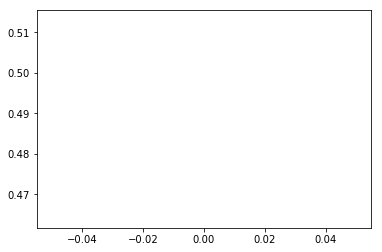

In [8]:
plt.plot(loss)
plt.show()

In [9]:
%%time

from Model import *
SGD= least_squares_SGD(max_iters = 100, gamma = 0.00000001)
GD = least_squares_GD(max_iters = 100, gamma = 0.00000001)

Wall time: 2 ms


In [10]:
%%time

GD.fit(yb_without_point, input_without_point)

Wall time: 4.25 s


In [12]:
from cross_val import cross_validation



SyntaxError: invalid syntax (<ipython-input-12-aa36d6eed8b9>, line 3)

In [13]:
%%time
cross_validation(SGD, yb_without_point, input_without_point, 5)

Wall time: 374 ms


([0.50787271768078257,
  0.50028904815572794,
  0.49980352235432912,
  0.50040543861258291,
  0.50082712024900222],
 [0.50290801314900746,
  0.50039653009440443,
  0.49906646442749247,
  0.50049580535899374,
  0.50147524981272973])